# Projeto Final

In [1]:
import requests as r
import datetime as dt
import csv

In [2]:
url ="https://api.covid19api.com/dayone/country/brazil"
resp = r.get(url)

resp.status_code

200

In [3]:
raw_data = resp.json()
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [4]:
final_data=[]
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])
    #Lista de listas

    

In [5]:
#inserindo cabeçalho na posição zero
final_data.insert(0, ['confirmados', 'obitos', 'recuperados','ativos', 'data']) 
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


In [6]:
#criando referências mais intuitivas
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [7]:
for i in range(1, len(final_data)):
    final_data[i][DATA]= final_data[i][DATA][ :10] #reduz para o caractere de índice 9

In [8]:
#criar csv

with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)
    

In [9]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d')

In [10]:
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

# Projeto Final (Parte 2)

Nessa etapa serão gerados gráficos com os dados obtidos e tratados.

In [11]:
def get_datasets (y, labels):
    if type(y[0])== list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data' : y[i]
            })
        return(datasets)
    else:
        return({
            'label': label[0],
            'data': y
        })

In [12]:
""" 
Se o título não for definido pelo usuário, a função vai fornecer uma string vazia.
Os pormenores dessa função são feitos para serem compatíveis com a API que será utilizada 
para a confecção dos gráficos.
"""
def set_title(title =''):
    if title!= '':
        display = 'true'  #A documentação da API solicita que esse parâmetro seja uma string
    else:
        display = 'false' #A documentação da API solicita que esse parâmetro seja uma string
    return({
        'title':title,
        'display': display
    })

In [13]:
def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    chart = {
        'type': kind,
        'data':{
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [14]:
"""
Envia a requisição com os dados do gráfico para a API.
"""

def get_api_chart(chart):
    url_base ='https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content #retorna a resposta da requisição, que é um valor binário

In [15]:
"""
Salva a imagem do gráfico
"""

def save_image (path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [16]:
"""
Importando funções para exibir a imagem.
Nota: A biblioteca PIL (utilizada na aula) não está mais disponível. Por isso foi utilizada a biblioteca Pillow.
"""
!pip install Pillow 
from PIL import Image
from IPython.display import display


In [17]:
def display_image(path):
    img_pil= Image.open(path)
    display(img_pil)
    

In [18]:
y_data_1 = []
for obs in final_data[1::30]: #pulando de 30 em 30 dias
    y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::30]: #pulando de 30 em 30 dias
    y_data_2.append(obs[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::30]: #pulando de 30 em 30 dias
    x.append(obs[DATA].strftime('%d/%m/%Y')) #strftime parte de um tipo datetime e retorna uma string

    

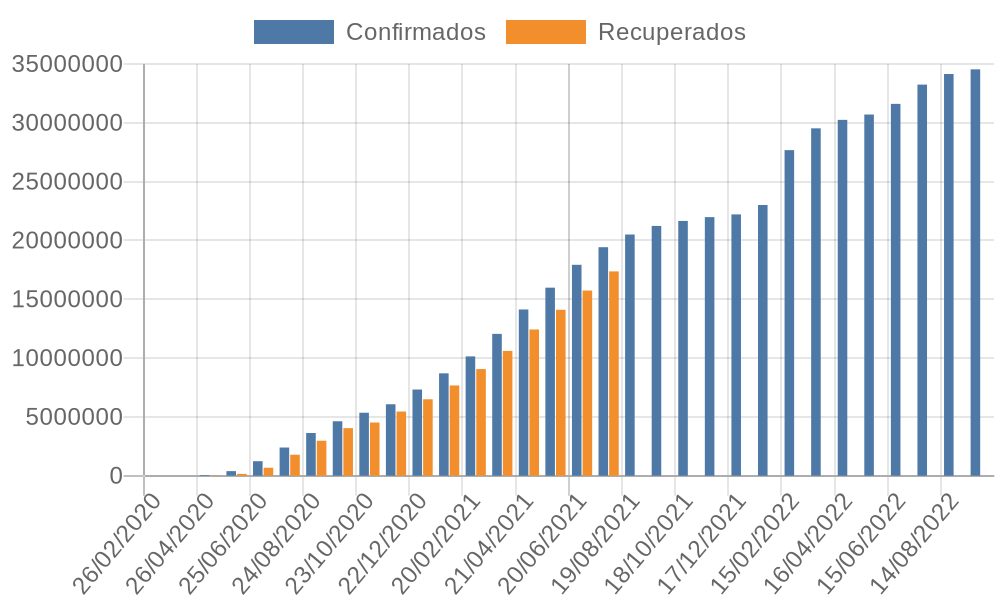

In [19]:
chart = create_chart(x, [y_data_1, y_data_2], labels, title = 'Confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [23]:
from urllib.parse import quote
def get_api_qrcode(link):
    text = quote(link) #parsing do link para url
    url_base ='https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content
   

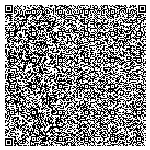

In [30]:
url_base ='https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')